# Time Series Forecasting Project — PepsiCo Stock Price

In [3]:
import pandas as pd

# Load your CSV
df = pd.read_csv("Pepsico_stock.csv")  # Path adjust karo if needed

# Convert Date to datetime (only if not already in datetime)
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Show first few rows
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
1985-07-01,1.253391,1.261241,1.250774,1.256007,3735000
1985-07-02,1.250774,1.261241,1.250774,1.253391,4046400
1985-07-03,1.256007,1.258624,1.256007,1.256007,2550600
1985-07-05,1.266475,1.266475,1.245542,1.245542,2237400
1985-07-08,1.245540,1.266473,1.242923,1.266473,3744000


In [5]:
df.to_csv('stock.csv')

#  Step 2: Time Series Exploration

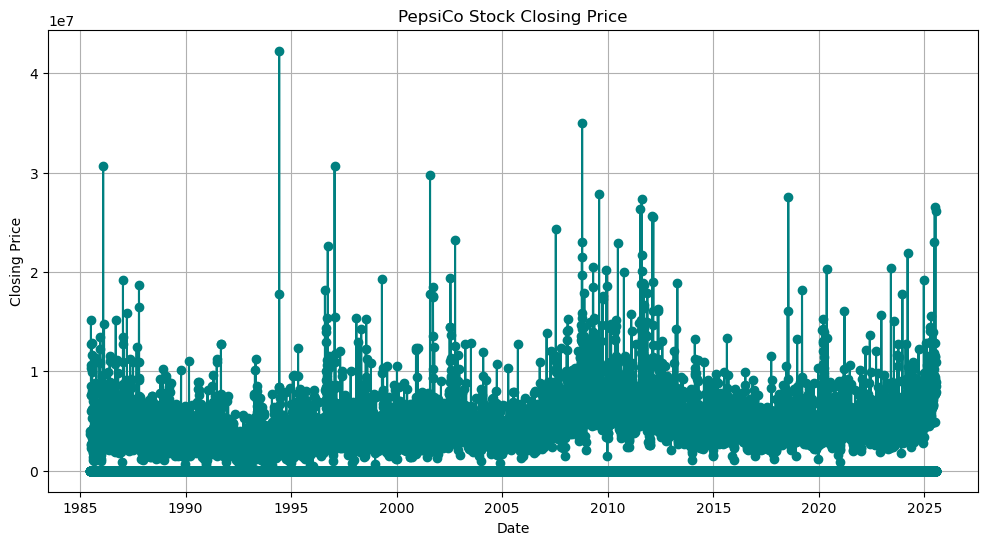

In [2]:

plt.figure(figsize=(12, 6))
plt.plot(df, color='teal', marker='o')
plt.title("PepsiCo Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()


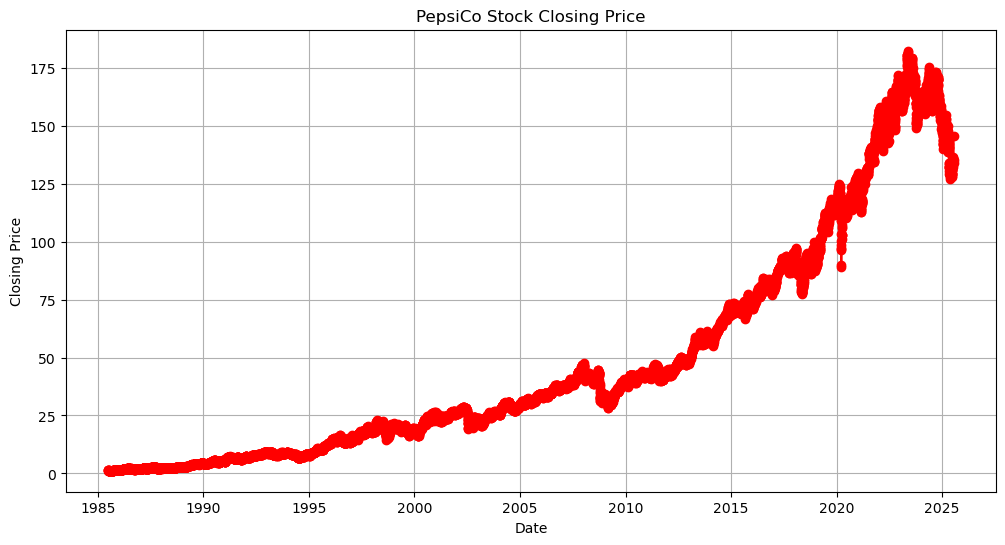

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='red', marker='o')
plt.title("PepsiCo Stock  Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

# Step 3: Stationarity Check

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.6176949545866268
p-value: 0.9880437550328114


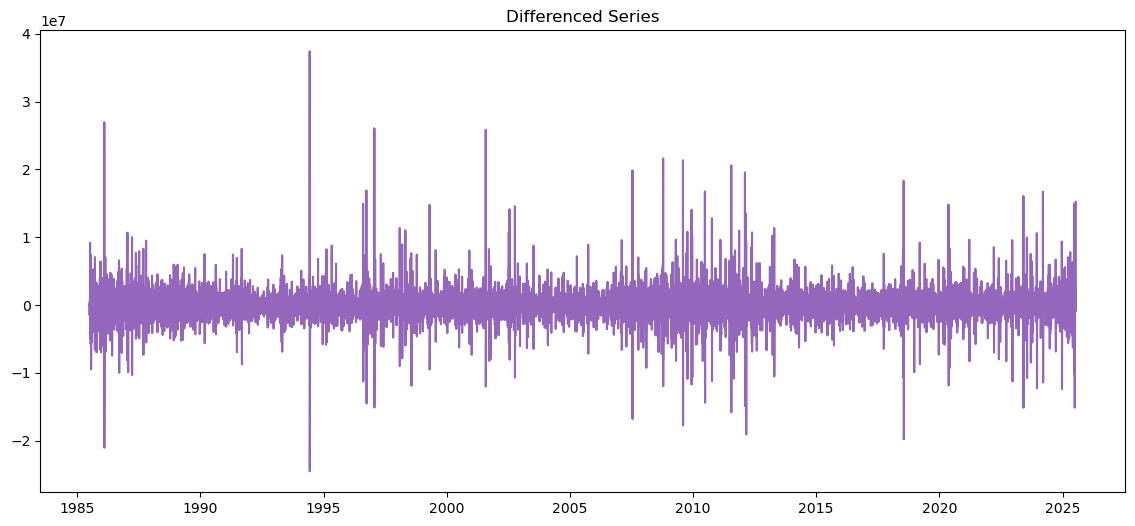

In [40]:
plt.figure(figsize=(14,6))
df_diff = df.diff().dropna()
plt.plot(df_diff)
plt.title("Differenced Series")
plt.show()


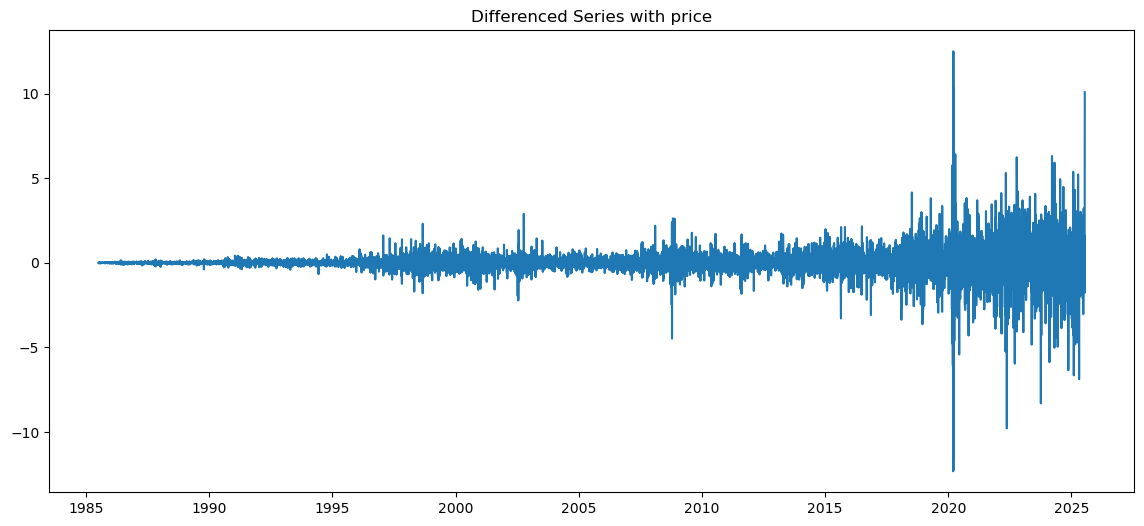

In [39]:
plt.figure(figsize=(14,6))
df_diff = df['Close'].diff().dropna()
plt.plot(df_diff)
plt.title("Differenced Series with price")
plt.show()

#  Step 4: ARIMA Modeling

In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)
print("Next 10 Days Forecast:\n", forecast)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10089
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11966.296
Date:                Tue, 29 Jul 2025   AIC                          23938.593
Time:                        22:16:28   BIC                          23960.250
Sample:                             0   HQIC                         23945.920
                              - 10089                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2252      0.020    -11.160      0.000      -0.265      -0.186
ma.L1          0.1045      0.021      4.881      0.000       0.063       0.146
sigma2         0.6278      0.002    305.076      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Step 5: Deep Learning with LSTM

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# Prepare sequences
X, y = [], []
for i in range(5, len(scaled)):
    X.append(scaled[i-5:i])
    y.append(scaled[i])

X, y = np.array(X), np.array(y)

# Reshape X to be 3D [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 5))


# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(5, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=200, verbose=0)

# Predict
# pred = model.predict(X)
# predicted = scaler.inverse_transform(pred)

predicted_full = np.zeros((pred.shape[0], 5))  # 5 = num of features in original scaler
predicted_full[:, 3] = pred[:, 0]  # 'Close' column was at index 3

# Inverse transform and extract only 'Close' column
predicted_actual = scaler.inverse_transform(predicted_full)[:, 3]


C:\Users\deppa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 6: Prediction & Evaluation

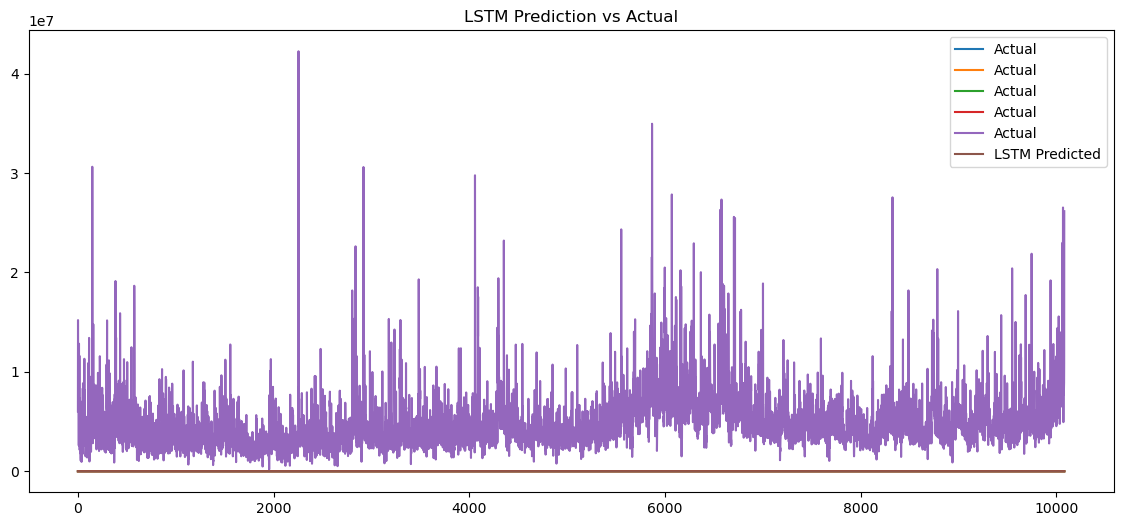

In [38]:
plt.figure(figsize=(14,6))
actual = df[5:].values  # Skipping first 5 for alignment
plt.plot(actual, label='Actual')
plt.plot(predicted_actual, label='LSTM Predicted')
plt.legend()
plt.title("LSTM Prediction vs Actual")
plt.show()


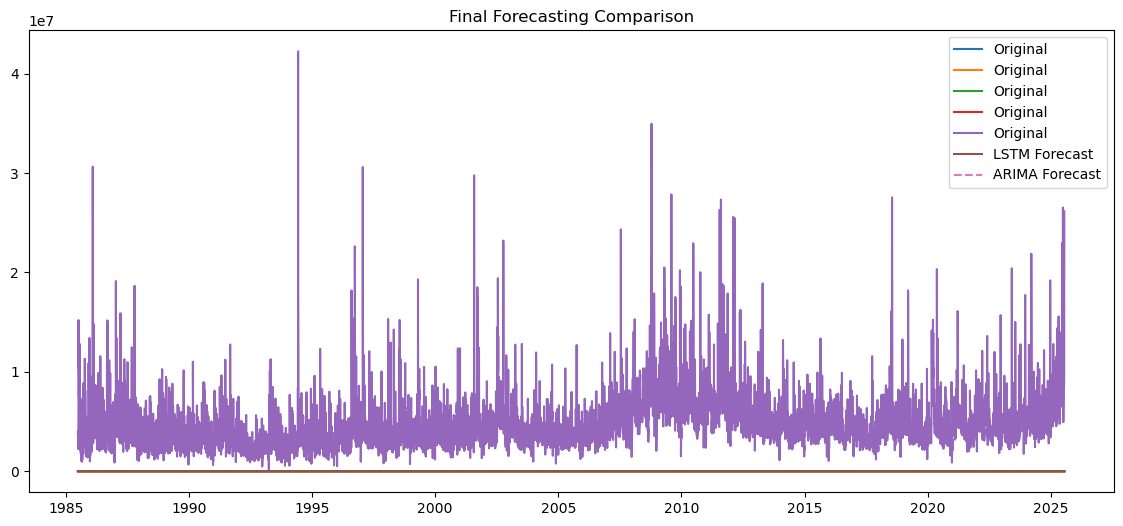

In [37]:
plt.figure(figsize=(14,6))
plt.plot(df, label='Original')
plt.plot(df.index[5:], predicted_actual, label='LSTM Forecast')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.legend()
plt.title("Final Forecasting Comparison")
plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# STEP 1: Load & Preprocess

df = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Use all important features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# STEP 2: Create sequences
X, y = [], []
n_steps = 5
for i in range(n_steps, len(scaled)):
    X.append(scaled[i-n_steps:i])
    y.append(scaled[i, 3])  # Predicting 'Close' price (4th column = index 3)

X, y = np.array(X), np.array(y)

# STEP 3: Build LSTM
model = Sequential()
model.add(Input(shape=(n_steps, X.shape[2])))  # shape=(5, 5)
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# STEP 4: Train
model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0088
Epoch 2/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4511e-05
Epoch 3/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7927e-05
Epoch 4/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7848e-05
Epoch 5/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9803e-05
Epoch 6/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9712e-05
Epoch 7/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9531e-05
Epoch 8/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5853e-05
Epoch 9/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7215e-05
Epoch 10/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6744e-05
Epoch 11/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9974e-05
Epoch 12/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9993e-05
Epoch 13/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8313e-05
Epoch 14/200
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.

In [12]:
# Create dummy array to match original feature size (5)
predicted_full = np.zeros((pred.shape[0], 5))   # shape: (10084, 5)
predicted_full[:, 3] = pred[:, 0]               # Index 3 is 'Close'

# Inverse transform
predicted_actual = scaler.inverse_transform(predicted_full)[:, 3]  # Extract Close only
predicted_actual

array([  4.8004473 ,   5.43490412,   8.27619024, ..., 115.37789446,
       114.73418752, 116.31734609])

In [13]:
actual_close = df['Close'].values[n_steps:]  # Align with prediction
dates = df.index[n_steps:]
dates

DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-15', '1985-07-16', '1985-07-17', '1985-07-18',
               '1985-07-19', '1985-07-22',
               ...
               '2025-07-03', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11', '2025-07-14', '2025-07-15',
               '2025-07-16', '2025-07-17'],
              dtype='datetime64[ns]', name='Date', length=10084, freq=None)

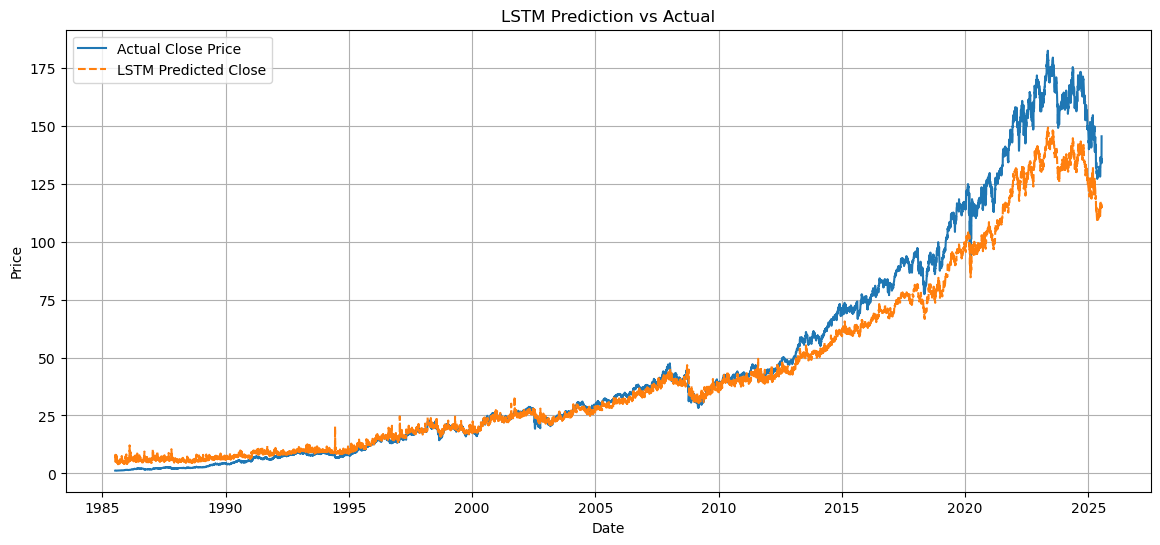

In [36]:
plt.figure(figsize=(14,6))
plt.plot(df.index[n_steps:], df['Close'].values[n_steps:], label="Actual Close Price")
plt.plot(df.index[n_steps:], predicted_actual, label="LSTM Predicted Close", linestyle='--')
plt.legend()
plt.title("LSTM Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

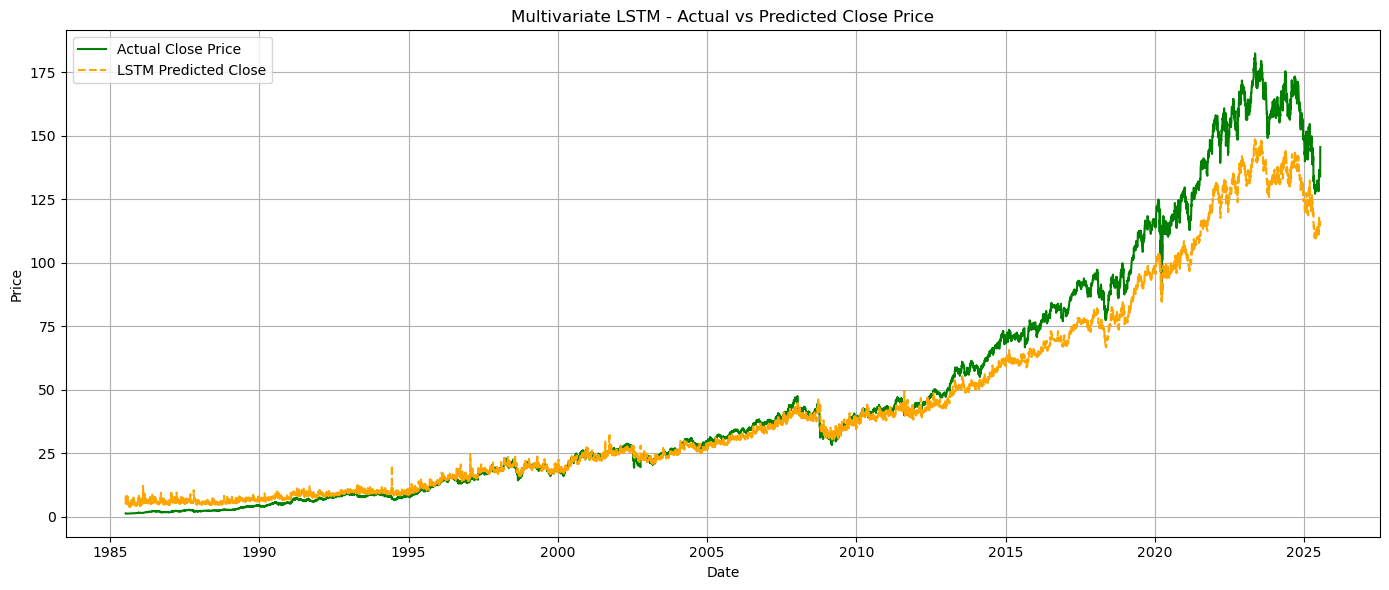

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(dates, actual_close, label="Actual Close Price", color='green')
plt.plot(dates, predicted_actual, label="LSTM Predicted Close", linestyle='--', color='orange')
plt.title("Multivariate LSTM - Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Future Forescast Function and prediction

In [24]:
def forecast_next_days(df, model, scaler, n_steps=5, n_days=50):
    last_data = df[-n_steps:].values
    predictions = []

    for _ in range(n_days):
        scaled = scaler.transform(last_data)
        X_input = scaled.reshape((1, n_steps, scaled.shape[1]))
        pred = model.predict(X_input)[0][0]

        # Create dummy for inverse transform
        dummy = np.zeros((1, 5))
        dummy[0, 3] = pred
        actual_pred = scaler.inverse_transform(dummy)[0, 3]
        predictions.append(actual_pred)

        # Shift window and add new prediction
        next_day = np.append(last_data[1:], [[actual_pred]*5], axis=0)
        last_data = next_day

    return predictions


In [25]:
future_preds = forecast_next_days(df, model, scaler, n_steps=5, n_days=50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [28]:

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=50)


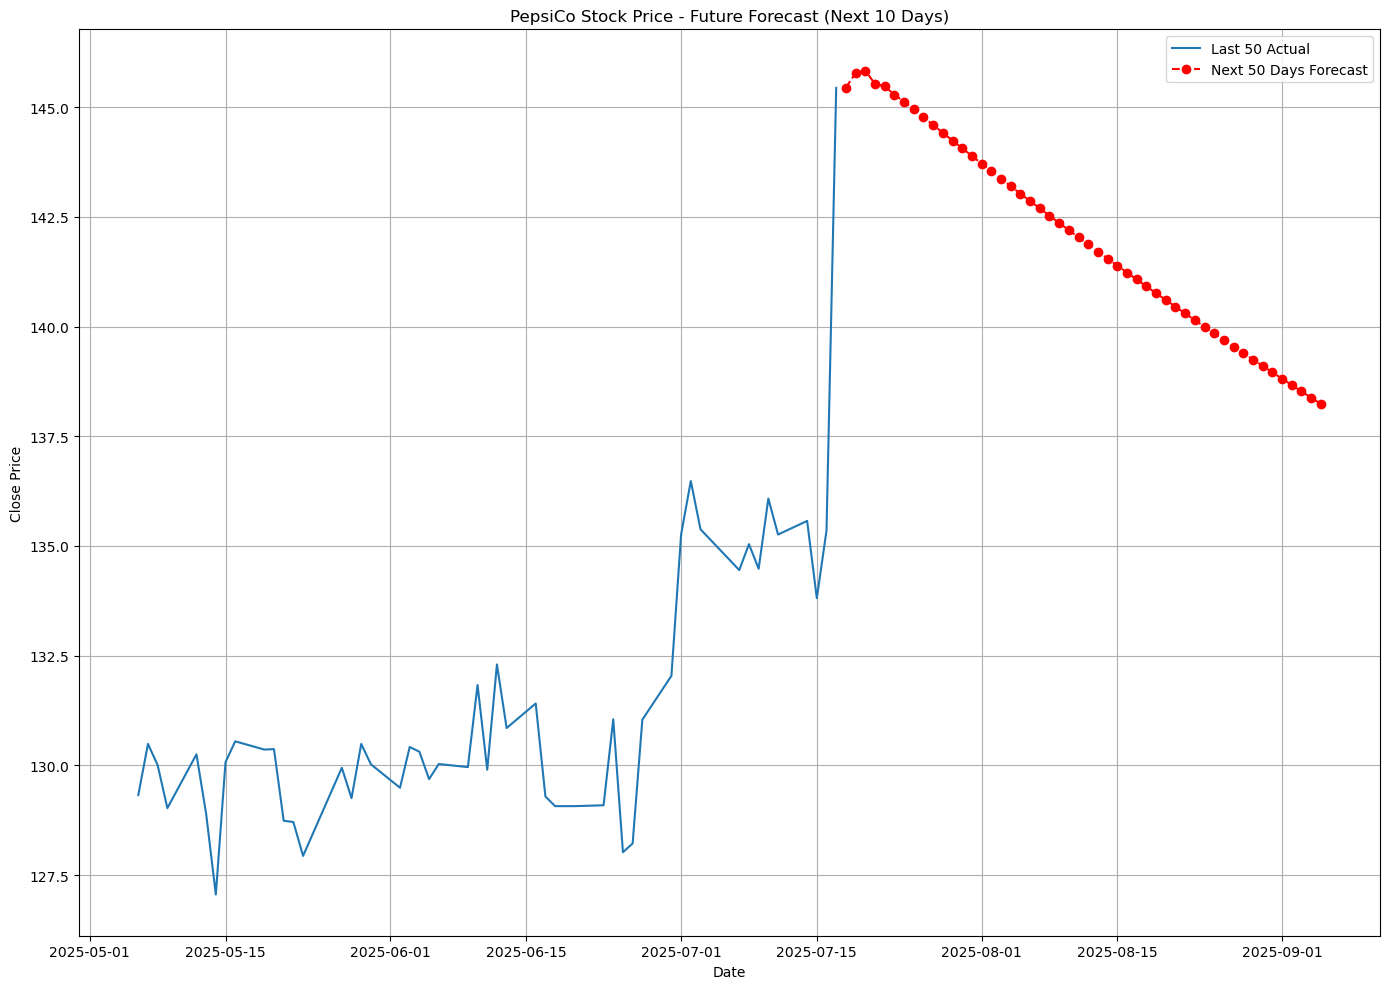

In [30]:
plt.figure(figsize=(14, 10))
plt.plot(df.index[-50:], df['Close'].values[-50:], label="Last 50 Actual")
plt.plot(future_dates, future_preds, label="Next 50 Days Forecast", linestyle='--', marker='o', color='red')
plt.title("PepsiCo Stock Price - Future Forecast (Next 10 Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
